# Customer Personality Analysis

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

plt.style.use('ggplot')

from sklearn.cluster import KMeans
from tqdm import tqdm

In [2]:
fileName = "marketing_campaign.csv"

In [3]:
df = pd.read_csv(fileName)

In [4]:
df

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...
...,...
2235,10870\t1967\tGraduation\tMarried\t61223\t0\t1\...
2236,4001\t1946\tPhD\tTogether\t64014\t2\t1\t10-06-...
2237,7270\t1981\tGraduation\tDivorced\t56981\t0\t0\...
2238,8235\t1956\tMaster\tTogether\t69245\t0\t1\t24-...


## Preprocessing

In [5]:
columns= df.columns[0].split()

In [6]:
temp=[]

for item in df.values:
    temp.append(item[0].split("\t"))
    # print(item[0].split("\t"))

In [7]:
df = pd.DataFrame(
    columns=columns,
    data=temp,
)

In [8]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [9]:
# getting income average before converting '' values to nan

temp = 0
count=0
for incomes in df.Income:
    if incomes != '':
        temp+=int(incomes)
        count+=1
averageIncome = (round((temp/count),2))

In [11]:
df.loc[(df.Income == ''),"Income"] = averageIncome

In [12]:
# numericCol = [
#     "Income","Kidhome","TeenHome","Recency","MntWines",
#     "MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds",
#     "NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStoresPurchases","NumWebVisitMonth",
    
# ]

fixedCol = [
    "ID","Year_Birth","Education","Marital_Status","Dt_Customer"
]

In [13]:
for col in df.columns:
    if col not in fixedCol:
        df[col] = df[col].astype(int)

In [14]:
df["Year_Birth"] = pd.to_datetime(df["Year_Birth"]).dt.year
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   object        
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   int32         
 5   Kidhome              2240 non-null   int32         
 6   Teenhome             2240 non-null   int32         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int32         
 9   MntWines             2240 non-null   int32         
 10  MntFruits            2240 non-null   int32         
 11  MntMeatProducts      2240 non-null   int32         
 12  MntFishProducts      2240 non-null   int32         
 13  MntSweetProducts     2240 non-nul

## EDA

### Anomaly Detection

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52247.248661,25037.797168,1730.0,35538.75,51741.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


In [17]:
def identifyOutliers(data,col):
    """
    using Q1-3/2IQR to calculate "Minimum" and using Q3+3/2IQR to calculate "Maximum"
    """
    
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = data[col].quantile(0.75) - data[col].quantile(0.25)    
    
    # Source of Formula : https://builtin.com/data-science/boxplot
    minims = q1-((3/2)*iqr)
    maxes = q3+((3/2)*iqr)
    
    # Based on how Boxplot works 
    if (data[col].min() < minims) or (data[col].max() > maxes):
        # prevent True-False Column categorized as Outliers
        if (data[col].min() != 0) and (data[col].max() != 1):
            data[col].plot(kind='box',title=col,vert=False)
            plt.show()

    return True   

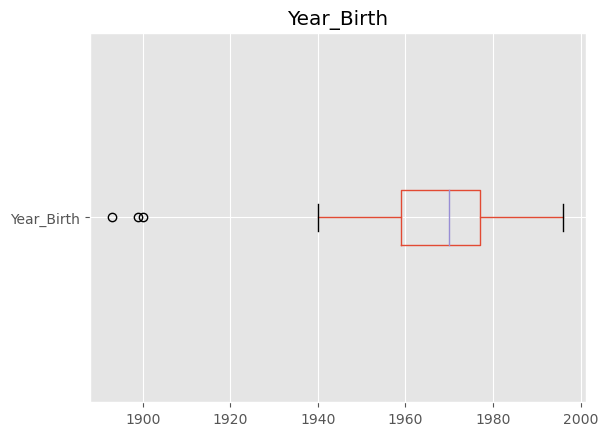

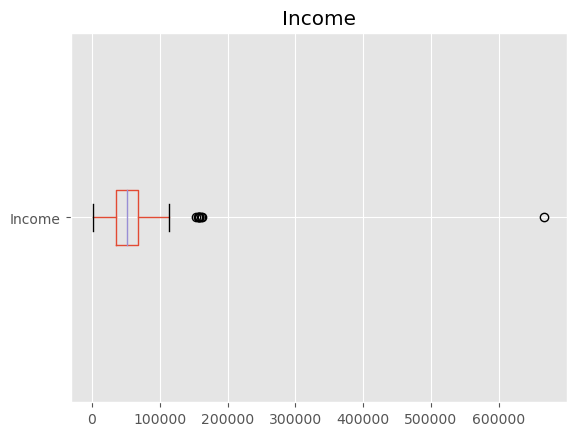

In [18]:
numerics = df.select_dtypes(include=['number'])

for cols in numerics.columns:
    identifyOutliers(df,cols)

In [19]:
# Year Birth and Income Column clearly detected to has an outliers. But the other 2 seems odd
df[['Z_Revenue','Z_CostContact']].describe()

,Z_Revenue,Z_CostContact
count,2240.0,2240.0
mean,11.0,3.0
std,0.0,0.0
min,11.0,3.0
25%,11.0,3.0
50%,11.0,3.0
75%,11.0,3.0
max,11.0,3.0


In [20]:
outliers = df[(df["Income"] > df["Income"].quantile(0.75)+((3/2)*(df["Income"].quantile(0.75)-df["Income"].quantile(0.25)))) |
   (df["Year_Birth"] < df["Year_Birth"].quantile(0.25)-((3/2)*(df["Year_Birth"].quantile(0.75)-df["Year_Birth"].quantile(0.25))))]

outliers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
164,8475,1973,PhD,Married,157243,0,1,2014-01-03,98,20,...,0,0,0,0,0,0,0,3,11,0
192,7829,1900,2n Cycle,Divorced,36640,1,0,2013-09-26,99,15,...,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182,0,1,2014-05-17,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532,0,0,2013-09-26,36,755,...,1,0,0,1,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397,1,1,2013-03-06,31,85,...,1,0,0,0,0,0,0,3,11,0
655,5555,1975,Graduation,Divorced,153924,0,0,2014-07-02,81,1,...,0,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803,0,0,2012-04-08,21,55,...,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733,1,0,2013-04-06,37,39,...,1,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146,0,0,2013-04-29,13,1,...,1,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,0,3,11,0


In [21]:
round((len(outliers)/len(df))*100,2)

0.49

In [22]:
# Since the Outliers Count are less than 25%. I think its safe to delete those values
# outliers.index
df = df.drop(labels=outliers.index,axis=0)

In [23]:
# Lets Check again
numerics = df.select_dtypes(include=['number'])

for cols in numerics.columns:
    identifyOutliers(df,cols)

In [24]:
df.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138,46344,71613,26646,58293
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,2012-04-09 00:00:00,2014-08-03 00:00:00,2013-08-21 00:00:00,2014-10-02 00:00:00,2014-01-19 00:00:00
Recency,58,38,26,26,94
MntWines,635,11,426,11,173


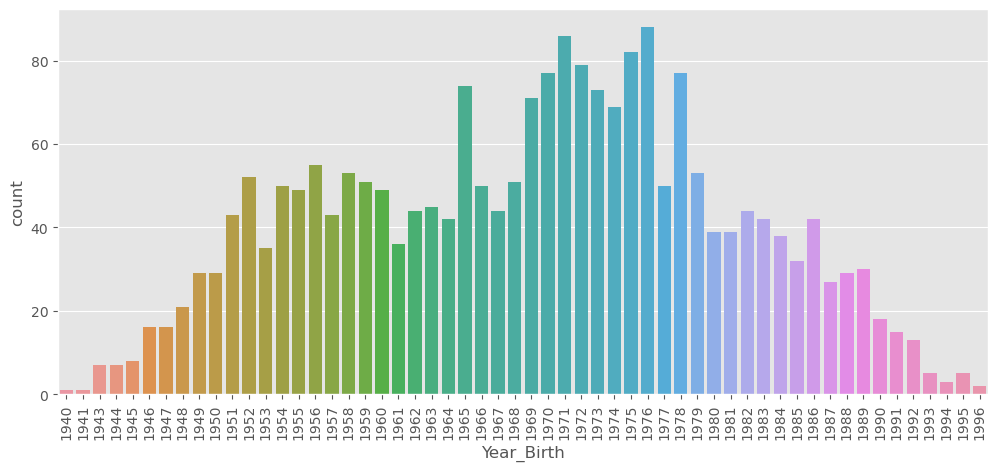

In [25]:
plt.figure(figsize=(12,5))
sb.countplot(data=df,x=df.Year_Birth)
plt.xticks(rotation=90)
plt.show()

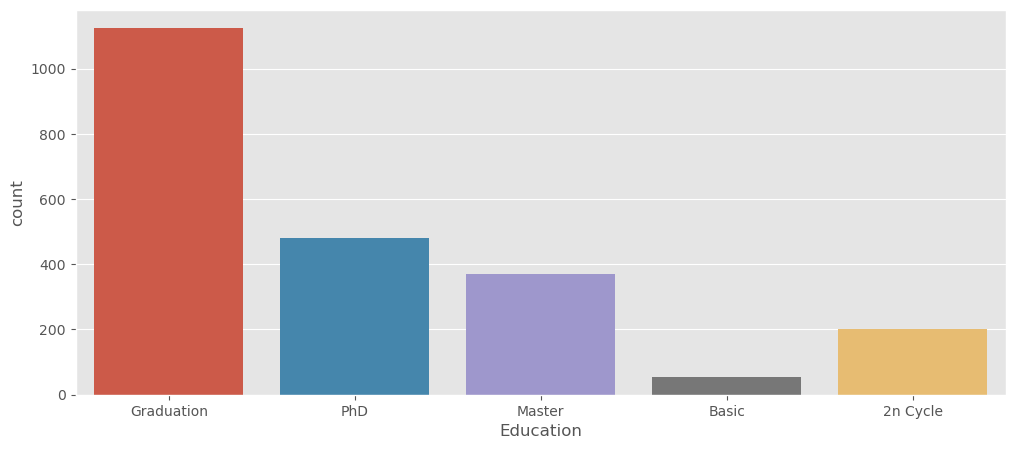

In [26]:
plt.figure(figsize=(12,5))
sb.countplot(data=df,x=df.Education)
plt.show()

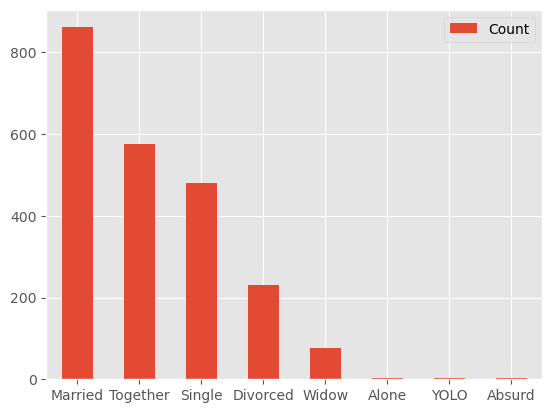

In [27]:
pd.DataFrame({
    'Marital_Status':df.Marital_Status.unique(),
    'Count':df.Marital_Status.value_counts()
}).plot.bar(rot=0)
plt.show()

## Modelling - Cluster

In [28]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [29]:
nonFeature = [
    "ID","Year_Birth","Dt_Customer","Recency"
]

In [30]:
df2 = df.copy()
df2 = df2.drop(columns = nonFeature,axis=1)
df2.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

In [31]:
#transofrming Category Column
df2 = pd.get_dummies(df2,columns=["Education","Marital_Status"],prefix='Category')
df2

,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Category_Master,Category_PhD,Category_Absurd,Category_Alone,Category_Divorced,Category_Married,Category_Single,Category_Together,Category_Widow,Category_YOLO
0,58138,0,0,635,88,546,172,88,88,3,...,0,0,0,0,0,0,1,0,0,0
1,46344,1,1,11,1,6,2,1,6,2,...,0,0,0,0,0,0,1,0,0,0
2,71613,0,0,426,49,127,111,21,42,1,...,0,0,0,0,0,0,0,1,0,0
3,26646,1,0,11,4,20,10,3,5,2,...,0,0,0,0,0,0,0,1,0,0
4,58293,1,0,173,43,118,46,27,15,5,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223,0,1,709,43,182,42,118,247,2,...,0,0,0,0,0,1,0,0,0,0
2236,64014,2,1,406,0,30,0,0,8,7,...,0,1,0,0,0,0,0,1,0,0
2237,56981,0,0,908,48,217,32,12,24,1,...,0,0,0,0,1,0,0,0,0,0
2238,69245,0,1,428,30,214,80,30,61,2,...,1,0,0,0,0,0,0,1,0,0


In [33]:
def elbow(n,data):
    inertia = []

    
    for i in tqdm(range(1,n)):
        kmc = KMeans(n_clusters=i,random_state=42)
        kmc.fit(data)
        inertia.append(kmc.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, n), inertia, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Variance Explained)')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()

Overall Cluster

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:18<00:00,  1.82s/it]


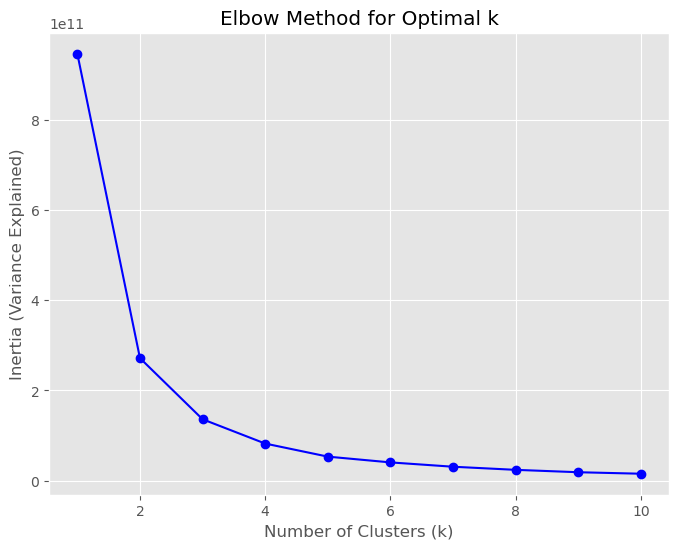

In [34]:
elbow(11,df2)



In [35]:

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df2)

cluster_labels = kmeans.labels_
cluster_labels

array([1, 0, 1, ..., 1, 1, 1])

In [36]:
df['Class'] = cluster_labels

In [37]:
df[df.Class == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,1118.0,1971.031306,11.237244,1940.0,1963.0,1972.0,1979.0,1996.0
Income,1118.0,34292.516100,10966.110850,1730.0,26592.5,35482.0,42966.0,51651.0
Kidhome,1118.0,0.720930,0.515585,0.0,0.0,1.0,1.0,2.0
Teenhome,1118.0,0.469589,0.538962,0.0,0.0,0.0,1.0,2.0
Recency,1118.0,48.906082,29.167088,0.0,24.0,49.0,75.0,99.0
MntWines,1118.0,76.216458,125.753876,0.0,9.0,25.0,85.0,1181.0
MntFruits,1118.0,6.978533,13.279500,0.0,1.0,3.0,8.0,151.0
MntMeatProducts,1118.0,35.739714,66.513434,0.0,8.0,17.0,43.0,1725.0
MntFishProducts,1118.0,11.089445,21.960065,0.0,2.0,4.0,12.0,208.0
MntSweetProducts,1118.0,7.194991,14.055507,0.0,1.0,3.0,8.0,157.0


In [38]:
df[df.Class == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,1111.0,1966.732673,11.779950,1941.0,1957.0,1967.0,1975.0,1995.0
Income,1111.0,69074.360036,11114.746869,51717.0,59949.0,68126.0,77447.0,113734.0
Kidhome,1111.0,0.166517,0.400669,0.0,0.0,0.0,0.0,2.0
Teenhome,1111.0,0.545455,0.548096,0.0,0.0,1.0,1.0,2.0
Recency,1111.0,49.307831,28.734490,0.0,25.0,51.0,73.0,99.0
MntWines,1111.0,535.207921,325.512255,5.0,278.0,492.0,748.0,1493.0
MntFruits,1111.0,45.840684,47.308693,0.0,9.5,28.0,69.5,199.0
MntMeatProducts,1111.0,295.644464,241.246841,3.0,104.0,224.0,430.0,1607.0
MntFishProducts,1111.0,64.362736,63.998584,0.0,13.0,42.0,99.0,259.0
MntSweetProducts,1111.0,47.253825,49.251702,0.0,9.0,30.0,71.5,263.0


In [39]:
df2.columns

Index(['Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Category_2n Cycle', 'Category_Basic', 'Category_Graduation',
       'Category_Master', 'Category_PhD', 'Category_Absurd', 'Category_Alone',
       'Category_Divorced', 'Category_Married', 'Category_Single',
       'Category_Together', 'Category_Widow', 'Category_YOLO'],
      dtype='object')

In [44]:
nonFeature = [
    'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
    'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
    'Income'
]

In [45]:
df3 = df2.drop(columns=nonFeature,axis=1)
df3.columns

Index(['Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'Category_2n Cycle', 'Category_Basic', 'Category_Graduation',
       'Category_Master', 'Category_PhD', 'Category_Absurd', 'Category_Alone',
       'Category_Divorced', 'Category_Married', 'Category_Single',
       'Category_Together', 'Category_Widow', 'Category_YOLO'],
      dtype='object')

100%|██████████| 10/10 [00:18<00:00,  1.88s/it]


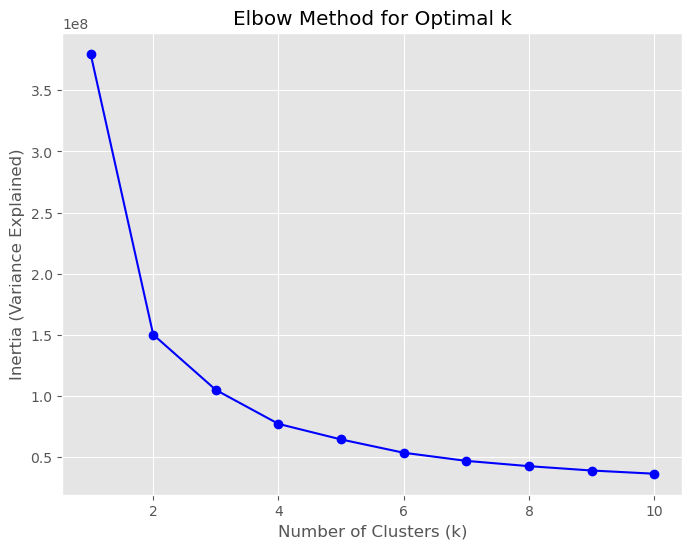

In [46]:
elbow(11,df3)

In [47]:
df3

,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Category_2n Cycle,Category_Basic,...,Category_Master,Category_PhD,Category_Absurd,Category_Alone,Category_Divorced,Category_Married,Category_Single,Category_Together,Category_Widow,Category_YOLO
0,0,0,635,88,546,172,88,88,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,11,1,6,2,1,6,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,426,49,127,111,21,42,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,11,4,20,10,3,5,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,173,43,118,46,27,15,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,1,709,43,182,42,118,247,0,0,...,0,0,0,0,0,1,0,0,0,0
2236,2,1,406,0,30,0,0,8,0,0,...,0,1,0,0,0,0,0,1,0,0
2237,0,0,908,48,217,32,12,24,0,0,...,0,0,0,0,1,0,0,0,0,0
2238,0,1,428,30,214,80,30,61,0,0,...,1,0,0,0,0,0,0,1,0,0
